# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [242]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [243]:
weather_api_key

'845ecb920cb4e0df16aec9c424da18ef'

### Generate the Cities List by Using the `citipy` Library

In [208]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [209]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"] 
        city_wind = city_weather["wind"]["speed"] 
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | te anau
Processing Record 3 of Set 1 | santa cruz
Processing Record 4 of Set 1 | hambantota
Processing Record 5 of Set 1 | chatham
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ahipara
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | waw
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | mount darwin
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | gallup
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | puerto escondido
Proces

Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | homer
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | coahuayana
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | buluang
Processing Record 47 of Set 4 | inirida
Processing Record 48 of Set 4 | sambava
Processing Record 49 of Set 4 | odweyne
Processing Record 0 of Set 5 | batemans bay
Processing Record 1 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 2 of Set 5 | phalodi
Processing Record 3 of Set 5 | korla
Processing Record 4 of Set 5 | souillac
Processing Record 5 of Set 5 | dauriya
Processing Record 6 of Set 5 | limbang
Processing Record 7 of Set 5 | derzhavinsk
Processing Record 8 of Set 5 | shubarshi
Processing Record 9 of Set 5 | namatanai
Processing Record 10 of Set 5 | rorvik
Processing Record 11 of Set 5 | murray bridge
Processing Record 12 of Set 5 | corralillo

Processing Record 27 of Set 8 | abu samrah
Processing Record 28 of Set 8 | svetlogorsk
Processing Record 29 of Set 8 | xining
Processing Record 30 of Set 8 | olafsvik
Processing Record 31 of Set 8 | codrington
Processing Record 32 of Set 8 | victor harbor
Processing Record 33 of Set 8 | tiksi
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | batticaloa
Processing Record 36 of Set 8 | grants
Processing Record 37 of Set 8 | kidal
Processing Record 38 of Set 8 | tingi
Processing Record 39 of Set 8 | poanas
Processing Record 40 of Set 8 | fortuna
Processing Record 41 of Set 8 | itupiranga
Processing Record 42 of Set 8 | krasnoselkup
Processing Record 43 of Set 8 | kirensk
Processing Record 44 of Set 8 | tual
Processing Record 45 of Set 8 | guarda
Processing Record 46 of Set 8 | funes
Processing Record 47 of Set 8 | batagay
Processing Record 48 of Set 8 | orotukan
Processing Record 49 of Set 8 | longyearbyen
Processing Record 0 of Set 9 | mayo
Processing Record 1 of S

Processing Record 15 of Set 12 | zheleznodorozhnyy
Processing Record 16 of Set 12 | kampot
Processing Record 17 of Set 12 | guerrero negro
Processing Record 18 of Set 12 | san francisco
Processing Record 19 of Set 12 | havelock
Processing Record 20 of Set 12 | arawa
Processing Record 21 of Set 12 | zhezkazgan
Processing Record 22 of Set 12 | shu
Processing Record 23 of Set 12 | mezen
Processing Record 24 of Set 12 | elizabeth city
Processing Record 25 of Set 12 | bandarbeyla
Processing Record 26 of Set 12 | lavrentiya
Processing Record 27 of Set 12 | anloga
Processing Record 28 of Set 12 | monaghan
Processing Record 29 of Set 12 | auki
Processing Record 30 of Set 12 | bambanglipuro
Processing Record 31 of Set 12 | bathsheba
Processing Record 32 of Set 12 | bereda
Processing Record 33 of Set 12 | den helder
Processing Record 34 of Set 12 | ha tinh
Processing Record 35 of Set 12 | kugulta
Processing Record 36 of Set 12 | arys
Processing Record 37 of Set 12 | tahta
Processing Record 38 of

In [210]:
# create json request
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 90.9733, 'lat': 23.8917},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 24.25,
  'feels_like': 24.32,
  'temp_min': 24.25,
  'temp_max': 24.25,
  'pressure': 1008,
  'humidity': 61,
  'sea_level': 1008,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 2.3, 'deg': 206, 'gust': 4.55},
 'clouds': {'all': 100},
 'dt': 1678821064,
 'sys': {'country': 'BD', 'sunrise': 1678838749, 'sunset': 1678881884},
 'timezone': 21600,
 'id': 1193823,
 'name': 'Nabīnagar',
 'cod': 200}

In [211]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [212]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,26.09,83,20,3.60,TO,1678820731
1,te anau,-45.4167,167.7167,10.16,90,93,0.36,NZ,1678820732
2,santa cruz,-17.8000,-63.1667,30.03,62,75,7.72,BO,1678820732
3,hambantota,6.1241,81.1185,25.19,100,0,1.03,LK,1678820733
4,chatham,51.3789,0.5279,7.92,52,100,1.79,GB,1678820733


In [213]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [214]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,26.09,83,20,3.60,TO,1678820731
1,te anau,-45.4167,167.7167,10.16,90,93,0.36,NZ,1678820732
2,santa cruz,-17.8000,-63.1667,30.03,62,75,7.72,BO,1678820732
3,hambantota,6.1241,81.1185,25.19,100,0,1.03,LK,1678820733
4,chatham,51.3789,0.5279,7.92,52,100,1.79,GB,1678820733


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-value is: -0.73


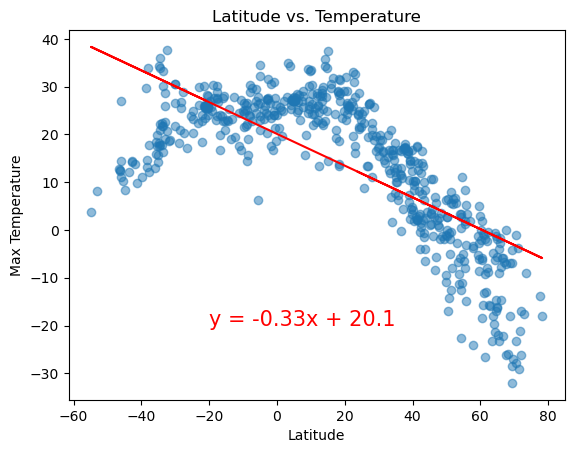

In [215]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat, temp, alpha=0.5)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
print("The r-value is: " + str(round(rvalue,2)))

plt.title("Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-value is: 0.02


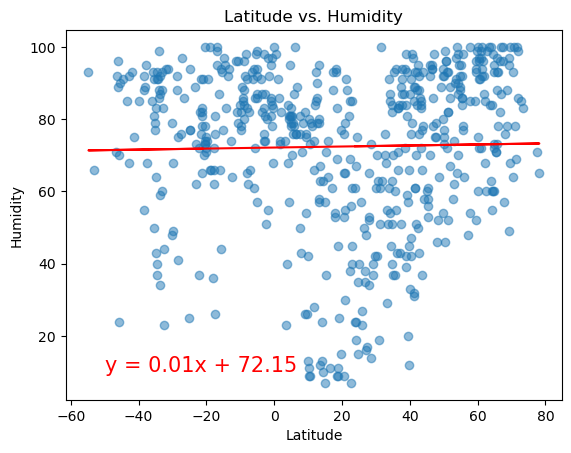

In [216]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]


# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, humidity, alpha=0.5)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print("The r-value is: " + str(round(rvalue,2)))


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-value is: 0.08


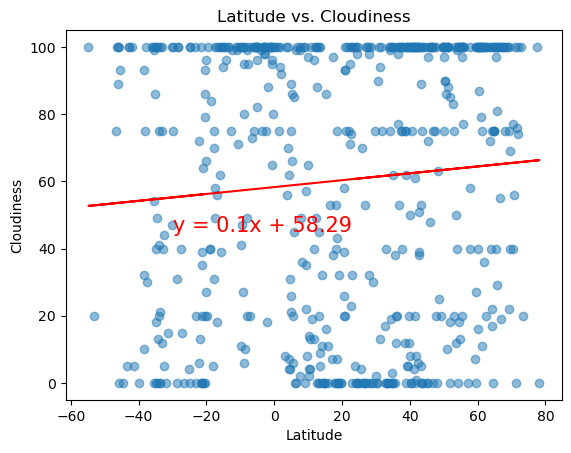

In [217]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
Cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, Cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, Cloudiness, alpha=0.5)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
print("The r-value is: " + str(round(rvalue,2)))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-value is: 0.18


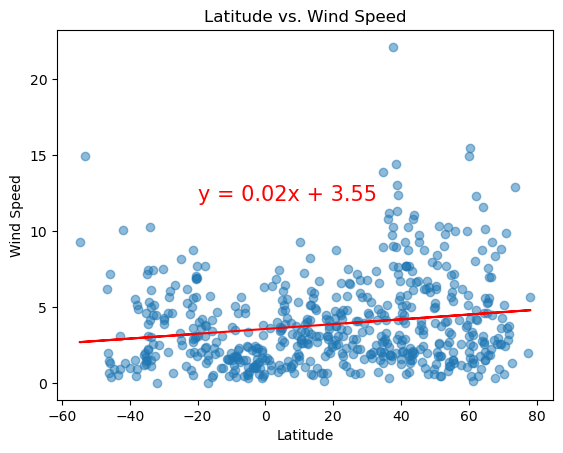

In [218]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude, wind_speed, alpha=0.5)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-20,12),fontsize=15,color="red")
print("The r-value is: " + str(round(rvalue,2)))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [219]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print("The r-value is :" + str(round(rvalue,2)))
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [220]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hambantota,6.1241,81.1185,25.19,100,0,1.03,LK,1678820733
4,chatham,51.3789,0.5279,7.92,52,100,1.79,GB,1678820733
5,pevek,69.7008,170.3133,-27.09,100,69,4.27,RU,1678820734
8,katsuura,35.1333,140.3000,10.01,70,62,2.78,JP,1678820735
10,waw,7.7029,27.9953,28.05,50,99,0.99,SS,1678820736


In [221]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,26.09,83,20,3.60,TO,1678820731
1,te anau,-45.4167,167.7167,10.16,90,93,0.36,NZ,1678820732
2,santa cruz,-17.8000,-63.1667,30.03,62,75,7.72,BO,1678820732
6,busselton,-33.6500,115.3333,16.41,87,0,1.14,AU,1678820464
7,ahipara,-35.1667,173.1667,14.19,77,100,1.73,NZ,1678820734


###  Temperature vs. Latitude Linear Regression Plot

The r-value is :-0.9


Text(0, 0.5, 'Max Temp')

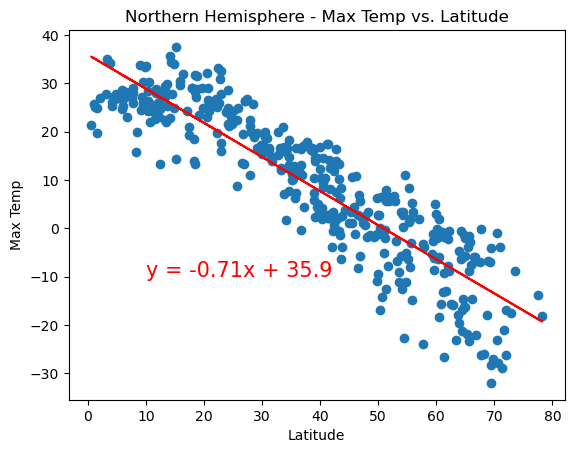

In [222]:
# Linear regression on Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 10, -10)

# Incorporate graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


The r-value is :0.43


Text(0, 0.5, 'Max Temp')

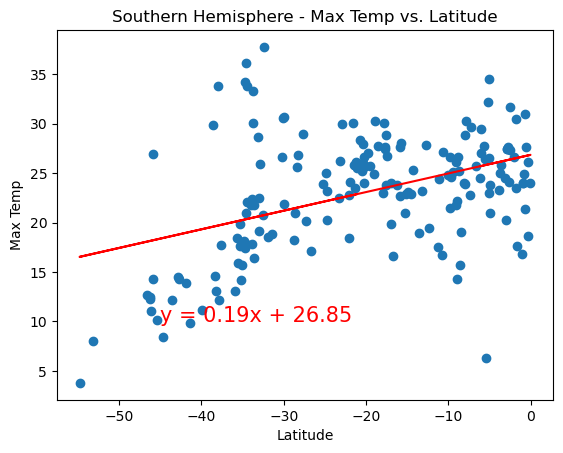

In [227]:
# Linear regression on Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -45, 10)

# Incorporate graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**There is a strong negative correlation between latitude and max temperature for the northern hemisphere. Whereas, there is a moderate positive correlation between latitude and max temperautre for the southern hemisphere.**


### Humidity vs. Latitude Linear Regression Plot

The r-value is :0.36


Text(0, 0.5, 'Humidity')

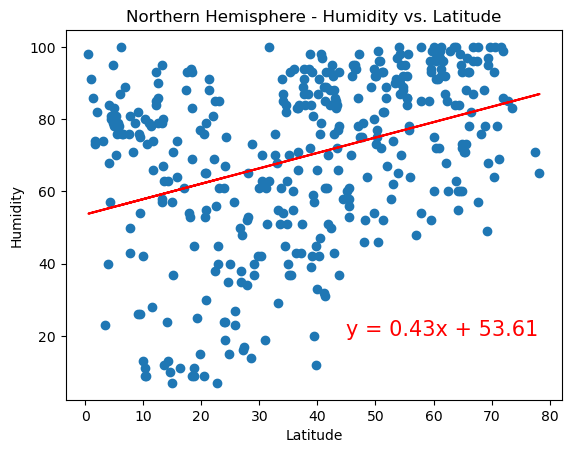

In [228]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 45, 20)

# Incorporate graph properties
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is :0.16


Text(0, 0.5, 'Humidity')

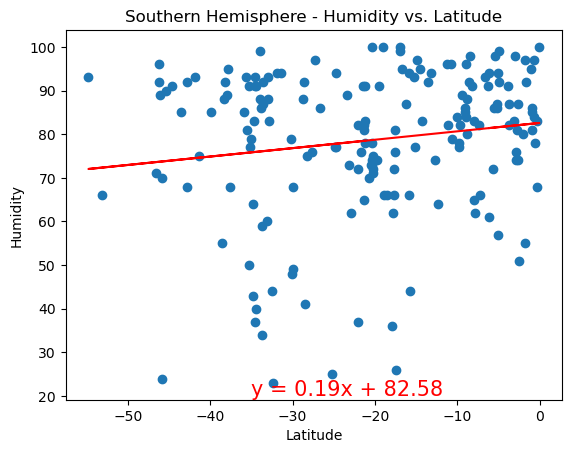

In [229]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -35, 20)

# Incorporate graph properties
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**There is a weak positive correlation between latitude and humidity for both northern and southern hemispheres.** 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is :0.24


Text(0, 0.5, 'Cloudiness')

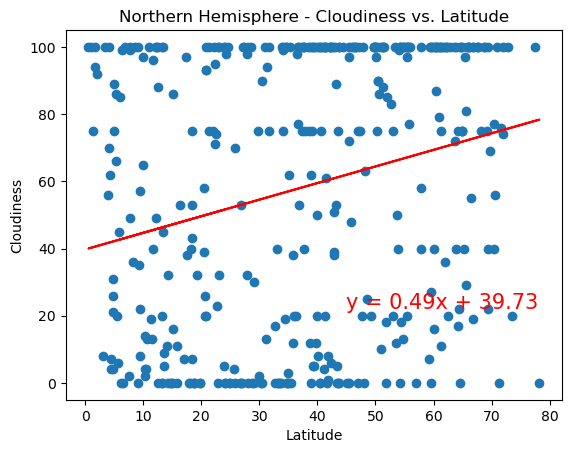

In [230]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 45, 22)

# Incorporate graph properties
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is :0.32


Text(0, 0.5, 'Cloudiness')

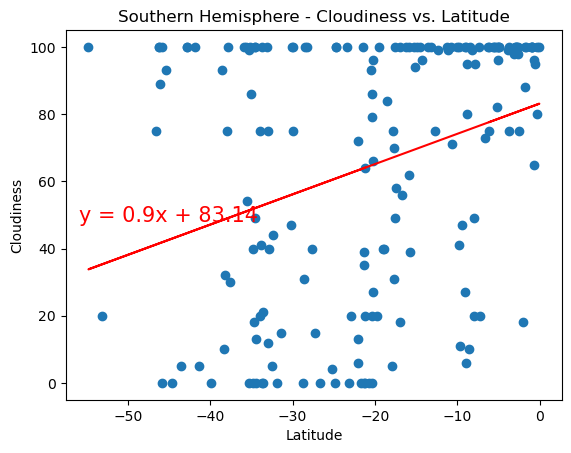

In [231]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -56, 48)

# Incorporate graph properties
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**There is a positive correlation between latitude and Cloudiness for both northern and southern hemispheres.** 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is :0.13


Text(0, 0.5, 'Wind Speed')

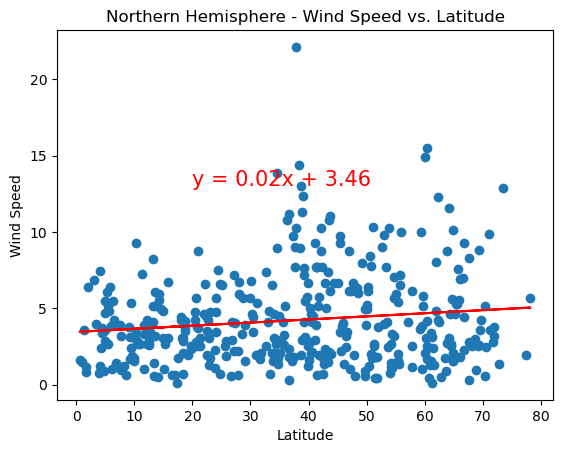

In [232]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 20, 13)

# Incorporate graph properties
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is :-0.33


Text(0, 0.5, 'Wind Speed')

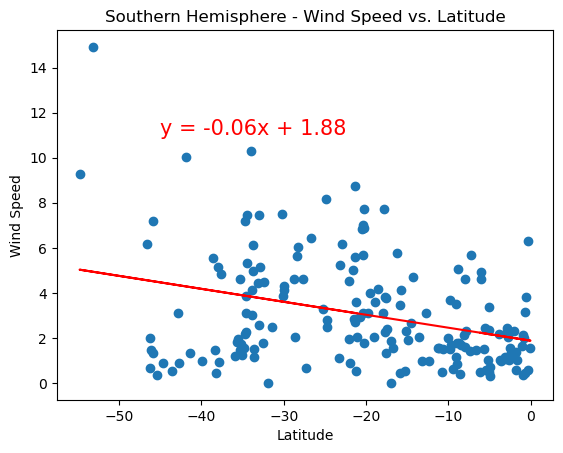

In [233]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -45, 11)

# Incorporate graph properties
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**There is a weak negative correlation between latitude and Wind Speed for northern hemisphere. Whereas, there is a strong negative correlation between latitude and Wind Speed for southern hemisphere** 